<h1>Implementation of the Breadth-First Search algorithm</h1>

<blockquote>
    Applied Discrete Structures by Alan Doerr & Kenneth Levasseur is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 3.0 United States License.
</blockquote>

b<p>
   We implement the breadth-first search algorithm from Section 9.3 of <i>Applied Discrete Structures</i> in this notebook.  We use external lists to keep track of whether a vertex has been found (array name: found) and where it was found from (array name: frm, since from is a reserved word).
</p>
<p>
    We start with a random graph.  The default is a random graph with 100 vertices and a probablity of any edge being present being 0.05.
</p>

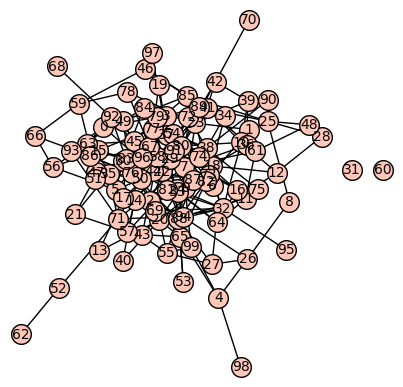

In [1]:
n=100
set_random_seed(2020)
rgraph=graphs.RandomGNP(n,0.05)
rgraph.plot()

<p>
 We will search for sink=95 starting at source=0.
</p>

In [2]:
source=0
sink=95

<p> 
    Initialize the "found" and "from" lists:
</p>

In [3]:
found=list(map(lambda k:False,range(n)))

In [4]:
frm=list(map(lambda k:-1,range(n)))

<p>
    The depth sets will be collected in a dictionary, the <m>k</m>th depth set being <c>depth[k]</c>.
</p>

In [5]:
depth={}

In [6]:
depth[0]=[source]

<p>
   Compute the depth sets.  Instead of stopping when the sink vertex is found, we continue until we get an empty depth set.  This will allow us to find paths to every reachable vertex.
</p>

In [7]:
r=0
while depth[r]!=[]:
    depth[r+1]=[]
    for v in depth[r]:
        for nb in rgraph.neighbors(v):
            if found[nb]==False:
                found[nb]=True
                frm[nb]=v
                depth[r+1].append(nb)
    r+=1

<p>
    At this point, the value of <c>r</c> is the depth at which we had an empty set and so the maximal depth is one less than this value.
</p>

In [8]:
r

6

In [13]:
depth

{0: [0],
 1: [44, 93, 63, 79],
 2: [0, 64, 80, 18, 50, 83, 30, 15, 49, 86, 71, 56, 92, 45, 14, 37, 7, 74],
 3: [16,
  33,
  27,
  75,
  96,
  17,
  6,
  22,
  41,
  10,
  42,
  36,
  12,
  76,
  29,
  69,
  73,
  47,
  2,
  51,
  38,
  81,
  84,
  5,
  77,
  85,
  66,
  91,
  35,
  52,
  55,
  94,
  3,
  68,
  58,
  67,
  65,
  40,
  57,
  97,
  82,
  88,
  72,
  61,
  24,
  11],
 4: [20,
  26,
  13,
  32,
  87,
  99,
  9,
  34,
  54,
  46,
  39,
  70,
  28,
  19,
  23,
  59,
  21,
  90,
  89,
  25,
  62,
  43,
  78,
  4,
  53,
  1,
  48],
 5: [8, 95, 98],
 6: []}

In [9]:
def path_to(v):
    if found[v]:
        S=[]
        k=v
        while frm[k]!=source:
            S.append(k)
            k=frm[k]
        S.append(k)
        S.append(source)
        return(S)
    else:
        print(str(v)+' not found from '+str(source))
        return  []

In [10]:
path_to(sink)

[95, 32, 6, 80, 44, 0]

<p>
    We can use the function to find other vertices.
</p>

In [11]:
path_to(30)

[30, 44, 0]

<p>
   Not every vertex can be reached:
</p>

In [12]:
path_to(31)

31 not found from 0


[]